In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [3]:
x = data.data
y = data.target

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45) 

In [5]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()

In [6]:
l.fit(x_train, y_train)

LinearRegression()

In [7]:
y_pred = l.predict(x_test)

In [8]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.5188113124539249
RMSE: 48.72713760953253


In [9]:
from sklearn.linear_model import Ridge
r = Ridge(alpha=0.0001)

In [14]:
r.fit(x_train, y_train)
y_pred = r.predict(x_test)

In [15]:
print('Ridge R2 Score:', r2_score(y_test, r.predict(x_test)))


Ridge R2 Score: 0.5189732635884952


In [17]:
print('Ridge RMSE:', np.sqrt(mean_squared_error(y_test, r.predict(x_test))))

Ridge RMSE: 48.71893700181955


In [9]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [10]:
x,y = make_regression(n_samples=100, n_features=1, noise=20, random_state=13, n_informative=1, n_targets=1)

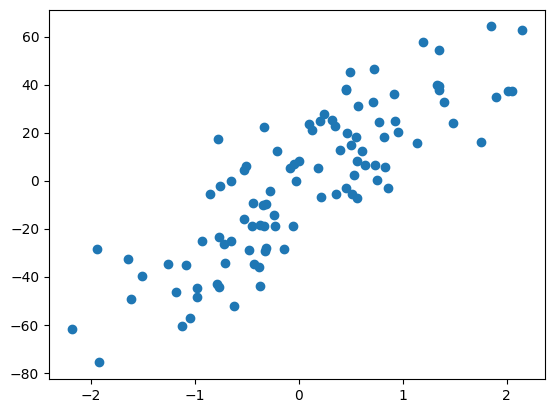

In [11]:
plt.scatter(x, y)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()
lr.fit(x, y)
print(lr.coef_, lr.intercept_)

[27.82809103] -2.29474455867698


In [14]:
from sklearn.linear_model import Ridge

In [15]:
rr = Ridge(alpha=10)
rr.fit(x, y)
print(rr.coef_, rr.intercept_)

[24.9546267] -2.126913003523573


In [16]:
rr1 = Ridge(alpha=100)
rr1.fit(x, y)
print(rr.coef_, rr.intercept_)

[24.9546267] -2.126913003523573


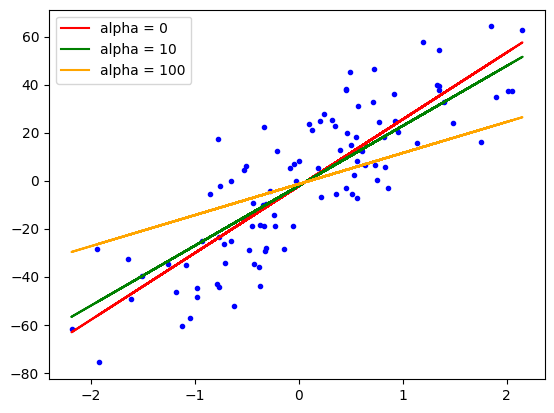

In [19]:
plt.plot(x,y,'b.')
plt.plot(x, lr.predict(x), color = 'red', label = 'alpha = 0')
plt.plot(x, rr.predict(x), color = 'green', label = 'alpha = 10')
plt.plot(x, rr1.predict(x), color = 'orange', label = 'alpha = 100')
plt.legend()


In [23]:
class myRidge:
    def __init__(self,alpha = 0.1):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, x_train, y_train):
        num  = 0
        den = 0
        for i in range(len(x_train)):
            num += (x_train[i] - np.mean(x_train)) * (y_train[i] - np.mean(y_train))
            den += (x_train[i] - np.mean(x_train))**2 
        self.m = num/(den + self.alpha)
        self.b = np.mean(y_train) - self.m * np.mean(x_train)
        print(self.m, self.b)

    def predict(self, x_test):
        y_pred = []
        for i in x_test:
            y = self.m * i + self.b
            y_pred.append(y)
        return np.array(y_pred)

In [26]:
reg = myRidge(alpha=100)

In [27]:
reg.fit(x, y)

[12.93442104] [-1.42484415]
